# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path

%matplotlib inline

In [2]:
# Read the Mapbox API key
mapbox_token = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units_per_year = sfo_data['housing_units'].groupby('year').mean()
housing_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

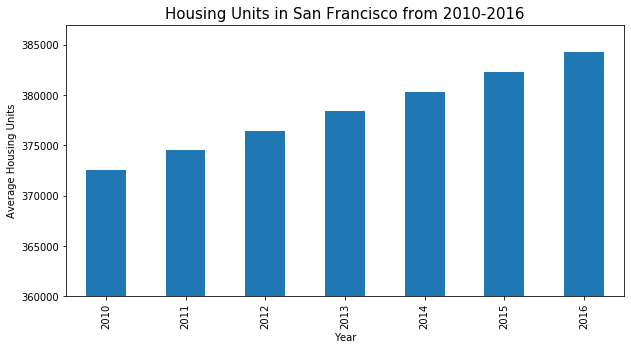

In [5]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

ax = housing_units_per_year.plot(kind='bar', ylim=(360000,387000), title="Housing Units in San Francisco from 2010-2016", figsize=(10,5))
ax.set_ylabel("Average Housing Units")
ax.set_xlabel("Year")
plt.title("Housing Units in San Francisco from 2010-2016",fontsize=15)
plt.show()
#housing_units_per_year.hvplot.bar(xlabel="Year",ylabel="Housing", min_height=370000, max_height=385000)

In [7]:

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!


#plt.show()
#plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [8]:
# Calculate the average gross rent and average sale price per square foot
#sfo_data.head()
avg_price_sq_foot = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
avg_price_sq_foot

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

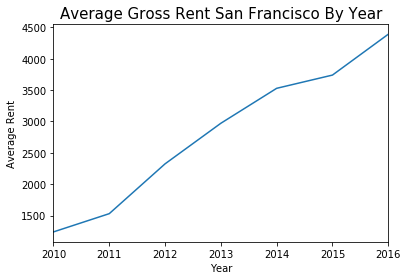

In [9]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_gross_rent = sfo_data[['gross_rent']].groupby('year').mean()
ax=avg_gross_rent.plot(legend=False)
ax.set_ylabel("Average Rent")
ax.set_xlabel("Year")
plt.title("Average Gross Rent San Francisco By Year", fontsize=15)
plt.show()

In [10]:
#avg_gross_rent.hvplot(x="Year")
#hvplot.help('line')

In [11]:
### Average Sales Price per Year

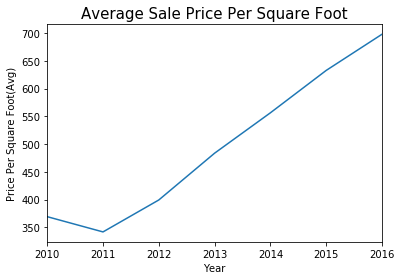

In [12]:
sfo_data.head()
average_sale_price_sqr_foot = sfo_data['sale_price_sqr_foot'].groupby('year').mean()
ax=average_sale_price_sqr_foot.plot()
ax.set_ylabel("Price Per Square Foot(Avg)")
ax.set_xlabel("Year")
plt.title("Average Sale Price Per Square Foot", fontsize=15)
plt.show()

In [13]:
#average_sale_price_sqr_foot.hvplot(title="Average Sale Price Per Square Foot",ylabel="Price Per Square Foot", yformatter="%.2f")

### Average Sales Price per Year

In [14]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [16]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data_new = pd.read_csv(file_path)
sfo_data_new.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)
sfo_data_new.head(10)
sfo_data_new.hvplot(x='year', y='sale_price_sqr_foot')
sfo_data_new_group =sfo_data_new.groupby(['year', 'Neighborhood']).mean()
sfo_data_new_group.head()
sfo_data_new.hvplot(x='year', y='sale_price_sqr_foot',groupby='Neighborhood',
                   ylabel="Average Price Per Square Foot", xlabel="Year")

:DynamicMap   [Neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [17]:
# New DataFrame created to plot interactive line above
sfo_data_new.head(10)

year      Neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [18]:
# Getting the data from the top 10 expensive neighborhoods
sfo_data_new.head()
#most_expensive_hoods = sfo_data_new['Neighborhood', 'sale_price_sqr_foot'].groupby('year').mean()
most_expensive_hoods = sfo_data[['neighborhood', 'sale_price_sqr_foot']].groupby('neighborhood').mean().sort_values('sale_price_sqr_foot',ascending=False)
top_10_most_expensive = most_expensive_hoods.nlargest(10,'sale_price_sqr_foot')
top_10_most_expensive

sale_price_sqr_foot
neighborhood                              
Union Square District           903.993258
Merced Heights                  788.844818
Miraloma Park                   779.810842
Pacific Heights                 689.555817
Westwood Park                   687.087575
Telegraph Hill                  676.506578
Presidio Heights                675.350212
Cow Hollow                      665.964042
Potrero Hill                    662.013613
South Beach                     650.124479

In [19]:
# Plotting the data from the top 10 expensive neighborhood
top_10_most_expensive.hvplot.bar(x='neighborhood', title='Top 10 Most Expensive Neighborhoods in San Francisco', 
                                 ylabel='Avg Sale Price Per Sq Foot', rot=90, height=500, width=800, xlabel="Neighborhood"
                                 )
#hvplot.help('bar')

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [57]:
# Parallel Coordinates Plot
#sfo_data_coordinates = sfo_data_new.drop(columns=['year'])

sfo_data_new.head()
parallel_coordinates_sfo = sfo_data_new[['Neighborhood', 'sale_price_sqr_foot', 'housing_units',
                                         'gross_rent']].groupby('sale_price_sqr_foot'
                                          ).mean().sort_values('sale_price_sqr_foot',ascending=False).reset_index()
top_10_parallel = parallel_coordinates_sfo.nlargest(10,'sale_price_sqr_foot')

px.parallel_coordinates(top_10_parallel, color="sale_price_sqr_foot")
#px.parallel_coordinates(sfo_data, color='sale_price_sqr_foot')

sale_price_sqr_foot   gross_rent  housing_units
Neighborhood                                                          
Union Square District           903.993258  2555.166667      377427.50
Merced Heights                  788.844818  3414.000000      380348.00
Miraloma Park                   779.810842  2155.250000      375967.25
Pacific Heights                 689.555817  2817.285714      378401.00
Westwood Park                   687.087575  3959.000000      382295.00

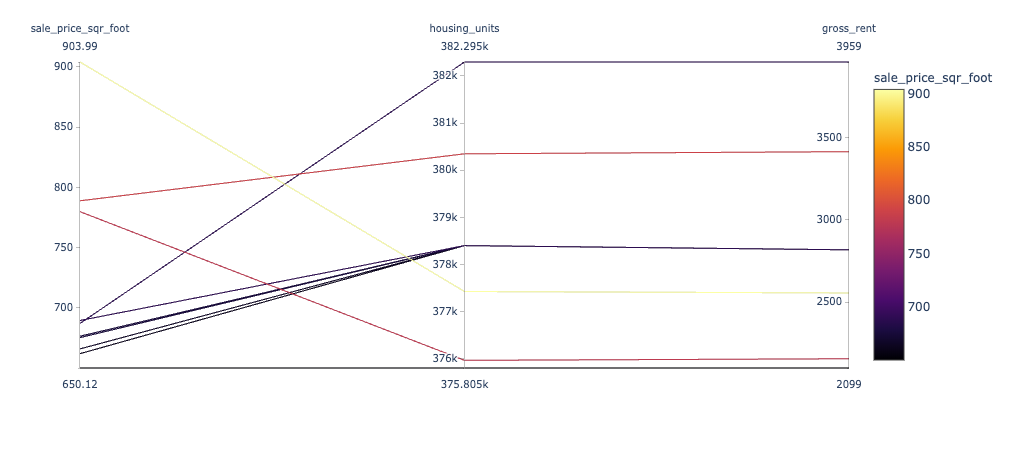

In [75]:
# Parallel Categories Plot
sfo_parallel_cat = sfo_data_new[['Neighborhood', 'sale_price_sqr_foot', 'gross_rent','housing_units']].groupby(
                                'Neighborhood').mean().sort_values('sale_price_sqr_foot',ascending=False).reset_index()
sfo_parallel_cat_top_10 = sfo_parallel_cat.nlargest(10,'sale_price_sqr_foot')
sfo_parallel_cat_top_10.head()

Neighborhood  sale_price_sqr_foot   gross_rent  housing_units
0  Union Square District           903.993258  2555.166667      377427.50
1         Merced Heights           788.844818  3414.000000      380348.00
2          Miraloma Park           779.810842  2155.250000      375967.25
3        Pacific Heights           689.555817  2817.285714      378401.00
4          Westwood Park           687.087575  3959.000000      382295.00

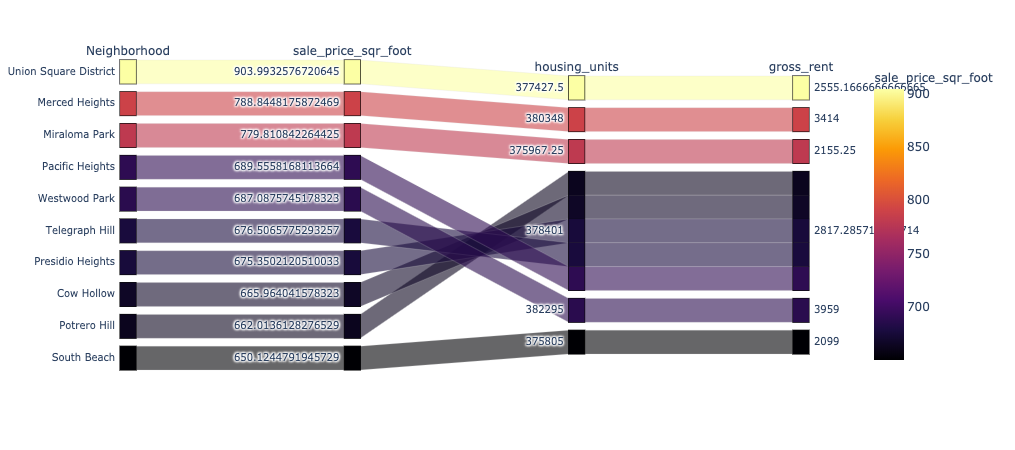

In [77]:
px.parallel_categories(
    sfo_parallel_cat_top_10,
    dimensions=["Neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
    color= 'sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
# Should I put labels in?  Also learn to round
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [78]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [85]:
# Calculate the mean values for each neighborhood
sfo_data_new.head()
sfo_data_new_mean = sfo_data_new[['Neighborhood', 'sale_price_sqr_foot', 'housing_units','gross_rent']].groupby(
                                'Neighborhood').mean().reset_index()
sfo_data_new_mean.head()

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [106]:
# Join the average values with the neighborhood locations
# Concat Data of both sheets
combined_sfo_data = pd.concat([sfo_data_new_mean, df_neighborhood_locations], axis='columns', join='inner')
# Reorder Columns
combined_sfo_data = combined_sfo_data[['Neighborhood', 'Lat', 'Lon', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']]
# Drop Duplicate Neighbor hood
combined_sfo_data = combined_sfo_data.loc[:, ~combined_sfo_data.columns.duplicated()]
combined_sfo_data.head(10)

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0       Alamo Square  37.791012 -122.402100           366.020712   
1         Anza Vista  37.779598 -122.443451           373.382198   
2            Bayview  37.734670 -122.401060           204.588623   
3    Bayview Heights  37.728740 -122.410980           590.792839   
4    Bernal Heights   37.728630 -122.443050           576.746488   
5   Buena Vista Park  37.768160 -122.439330           452.680591   
6   Central Richmond  37.777890 -122.445170           394.422399   
7     Central Sunset  37.749610 -122.489990           423.687928   
8  Clarendon Heights  37.753310 -122.447030           487.244886   
9     Corona Heights  37.785530 -122.456000           587.539067   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       379374.5  3080.333333  
5       378076.5  2698.833333  
6       378401.0  2817.285714  
7       378401.0  2817.285714  
8       376454.0  2250.500000  
9       377232.8  2472.000000

In [109]:
px.scatter_mapbox(combined_sfo_data, lat='Lat', lon='Lon', color='sale_price_sqr_foot')

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

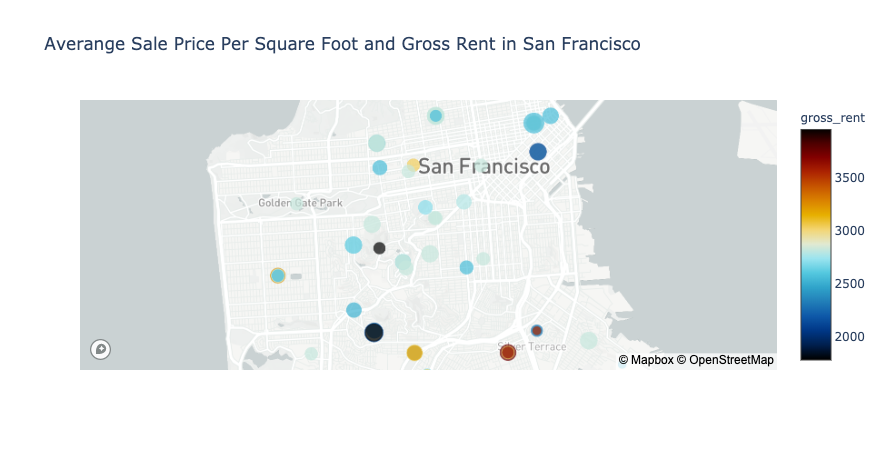

In [19]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!